In [1]:
################# User Inputs
# Paths
imDir = 'X:\\Force Project\\PublicationData\\SpinningDisk_Myosin\\3D_translationOnly'
dataName = 'manualTranslation_t'
dataDir = imDir + '\\OpticalFlow3D_Python\\' + dataName
saveDir = 'X:\\Force Project\\PublicationData\\SpinningDisk_Myosin\\PublicationFigures\\FigureS1'
# Metadata
xyscale = 0.065 # um/pixel
zscale = 0.2 # um/pixel
tscale = 45/60 # minutes/frame

################# Set up
# Notebook
import tifffile as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import colorcet as cc

# Convert paths
imDir = Path(imDir)
dataDir = Path(dataDir)
saveDir = Path(saveDir)

In [6]:
# Consistent visualization parameters
zSlice = 6 # ImageJ indexes from 1, so this matches the slice7 folder
ySlice = 1175-1-419 #  FIJI starts indexing from 1, and we have cropped, so this matches the 2D_yslice1175 folder

# Percentile reliablity kept
relPer = 90

# Velocity scale - consistent across the pixels/frames options
cmax = 1
cmin = -cmax
cticks = [-1,-.5,0,.5,1]

In [5]:
# Manual translation, in pixels (the expected values)
# phase 0 = only z motion
dx0 = np.zeros(7).astype(float)
dy0 = dx0
dz0 = np.ones(7)*0.5
# phase 1 = only y motion
dx1 = np.zeros(7).astype(float)
dy1 = np.ones(7)*0.5
dz1 = dx1
# phase 2 = only x motion
dx2 = np.ones(7)*0.5
dy2 = np.zeros(7).astype(float)
dz2 = dy2
# phase 3 = all three dimensions
dx3 = np.ones(7)*0.5
dy3 = np.ones(7)*0.5*-1 # Illustrate the y directions
dz3 = np.ones(7)*0.5*-1 # Go back towards the intial image to save pixels in z
# phase 4 = gradual changes
dx4 = np.array([0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
dy4 = np.array([-.4, -.3, -.2, -.1, 0, .1, .2, .3, .4])
dz4 = np.array([-.4, -.3, -.2, 0, 0, 0, 0, 0, 0])
# phase 5 = abrupt change
dx5 = np.ones(7)*-dx4[-1]
dy5 = np.ones(7)*-dy4[-1]
dz5 = np.ones(7)*-dz4[-1]
# phase 6 = hidden abrupt change
dx6 = np.ones(3)*-dx5[-1]
dy6 = np.ones(3)*-dy5[-1]
dz6 = np.ones(3)*-dz5[-1]

# Combine
dx = np.concatenate([dx0,dx1,dx2,dx3,dx4,dx5,dx6])*xyscale
dy = np.concatenate([dy0,dy1,dy2,dy3,dy4,dy5,dy6])*xyscale
dy = -dy # Positive y is down the image by default, but the current visualization, want to say that it is up
dz = np.concatenate([dz0,dz1,dz2,dz3,dz4,dz5,dz6])*zscale

t = np.arange(0,dx.shape[0])

# Expected Magnitude
ds = np.sqrt(np.power(dx,2)+np.power(dy,2)+np.power(dz,2))/tscale
# Angle in the xy plane
dtheta = np.arctan2(dy,dx) # Ranges from -pi to pi
# Angle with respect to the z-axis
dphi = np.arctan(dz/np.sqrt(np.power(dx,2)+np.power(dy,2))) # ranges from -pi/2 to pi/2

C:\Users\leer\AppData\Local\Temp\ipykernel_52816\3962989715.py:44: RuntimeWarning: divide by zero encountered in divide
  dphi = np.arctan(dz/np.sqrt(np.power(dx,2)+np.power(dy,2))) # ranges from -pi/2 to pi/2


In [ ]:
# Illustrate for one frame
f = 30

# Reliability thresholding
relFile = dataName + '_rel_t' + str(f).zfill(4) + '.tiff'

rel = tf.imread(dataDir / relFile)
relThresh = np.percentile(rel,relPer)
relMask = rel > relThresh

# Load and format velocity data
# For the first figures, leave in pixels/frame
vxFile = dataName + '_vx_t' + str(f).zfill(4) + '.tiff'
vx = tf.imread(dataDir / vxFile)
vx = vx*relMask # Remove unreliable vectors
vx[vx==0] = np.nan

vyFile = dataName + '_vy_t' + str(f).zfill(4) + '.tiff'
vy = tf.imread(dataDir / vyFile)
vy = vy*relMask # Remove unreliable vectors
vy = -vy # Positive y is down the image by default, but the current visualization, want to say that it is up
vy[vy==0] = np.nan

vzFile = dataName + '_vz_t' + str(f).zfill(4) + '.tiff'
vz = tf.imread(dataDir / vzFile)
vz = vz*relMask # Remove unreliable vectors
vz[vz==0] = np.nan


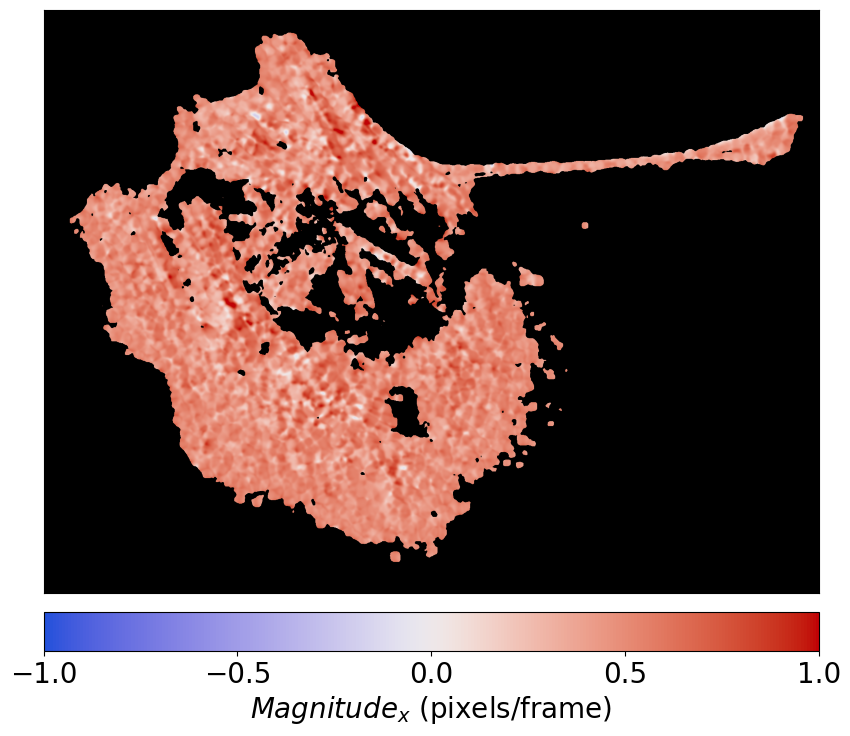

In [9]:
# vx
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

im = ax.imshow(vx[zSlice,:],vmin=cmin, vmax=cmax,cmap=cc.m_CET_D1)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1A_TranslationOnly_vx_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

cbar = plt.colorbar(im,ax=ax,orientation='horizontal',pad=0.025,ticks=cticks)
cbar.set_label("$Magnitude_x$ (pixels/frame)")

# Save with colorbar
saveName = 'FigureS1A_TranslationOnly_vx_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

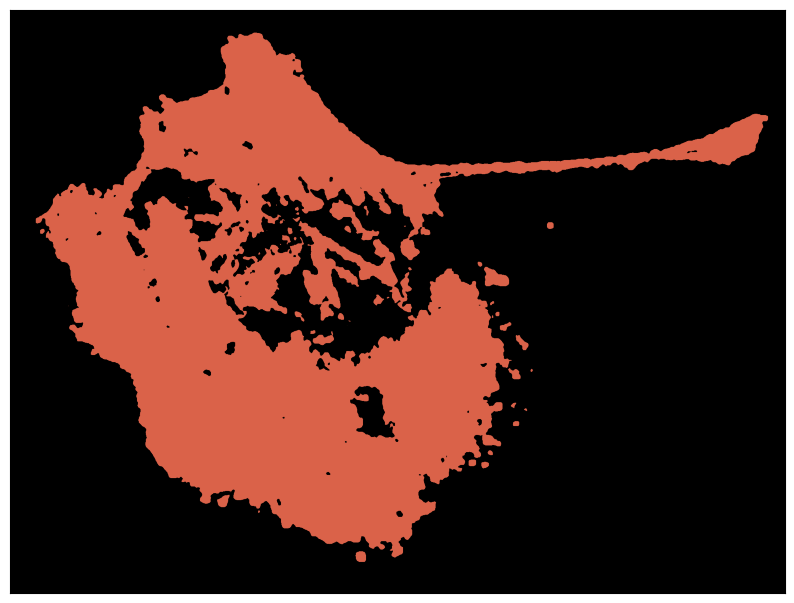

In [10]:
# vx - expected
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

toPlot = vx[zSlice,:]/vx[zSlice,:]
toPlot = toPlot*dx[f]/xyscale

im = ax.imshow(toPlot,vmin=cmin, vmax=cmax,cmap=cc.m_CET_D1)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1A_TranslationOnly_vxExpected_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

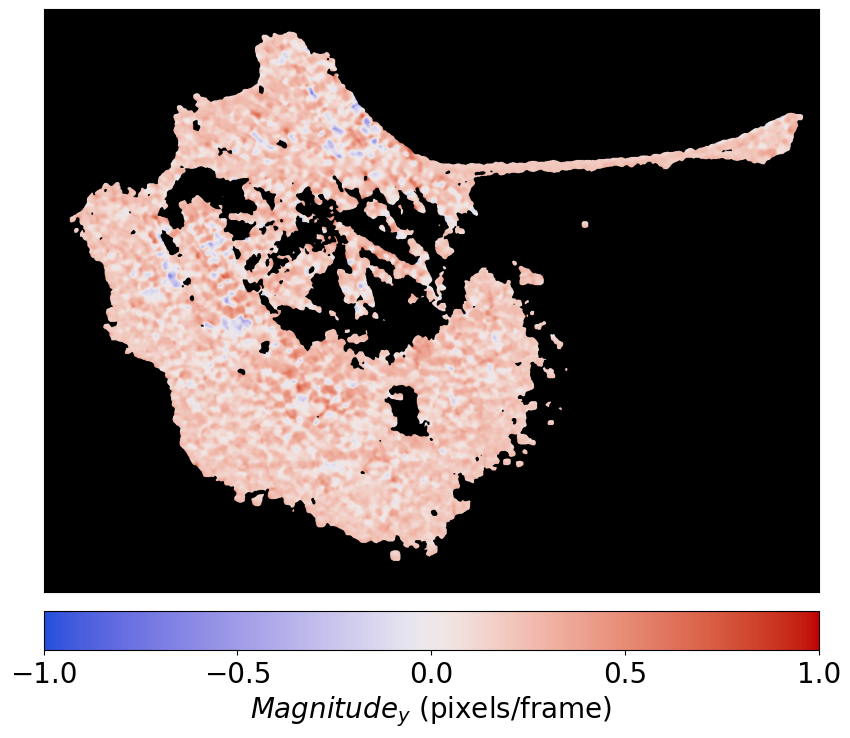

In [12]:
# vy
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

im = ax.imshow(vy[zSlice,:],vmin=cmin, vmax=cmax,cmap=cc.m_CET_D1)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1A_TranslationOnly_vy_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

cbar = plt.colorbar(im,ax=ax,orientation='horizontal',pad=0.025,ticks=cticks)
cbar.set_label("$Magnitude_y$ (pixels/frame)")

# Save with colorbar
saveName = 'FigureS1A_TranslationOnly_vy_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

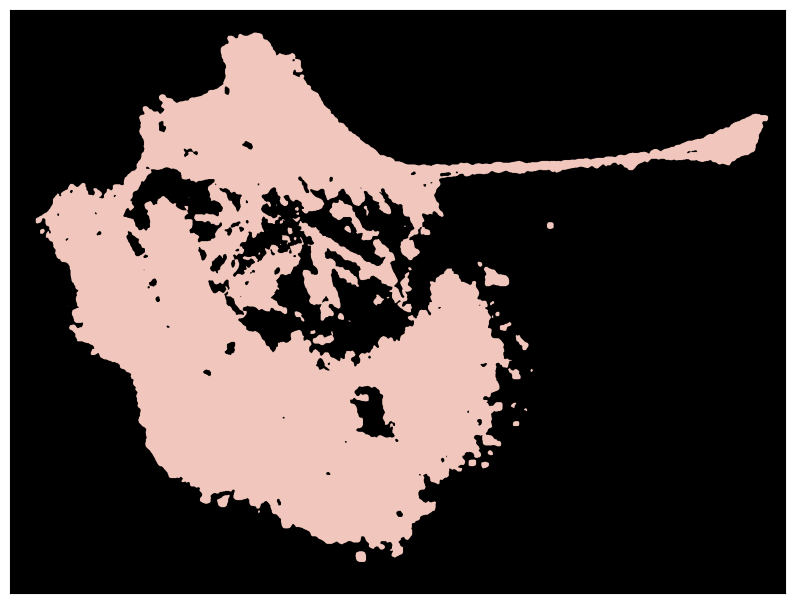

In [13]:
# vy - expected
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

toPlot = vy[zSlice,:]/vy[zSlice,:]
toPlot = toPlot*dy[f]/xyscale

im = ax.imshow(toPlot,vmin=cmin, vmax=cmax,cmap=cc.m_CET_D1)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1A_TranslationOnly_vyExpected_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

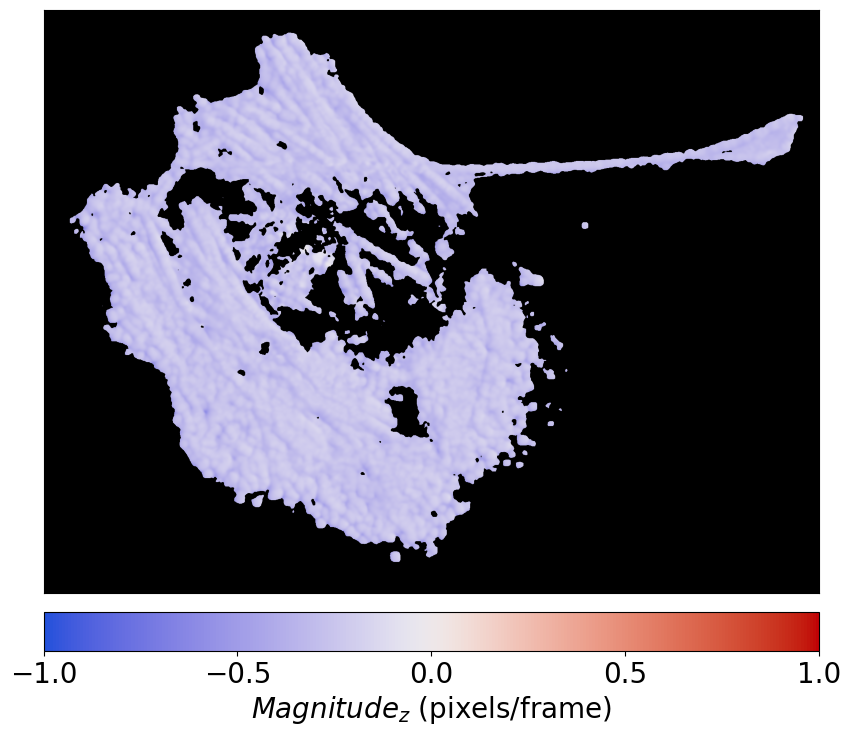

In [14]:
# vz
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

im = ax.imshow(vz[zSlice,:],vmin=cmin, vmax=cmax,cmap=cc.m_CET_D1)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1A_TranslationOnly_vz_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

cbar = plt.colorbar(im,ax=ax,orientation='horizontal',pad=0.025,ticks=cticks)
cbar.set_label("$Magnitude_z$ (pixels/frame)")

# Save with colorbar
saveName = 'FigureS1A_TranslationOnly_vz_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

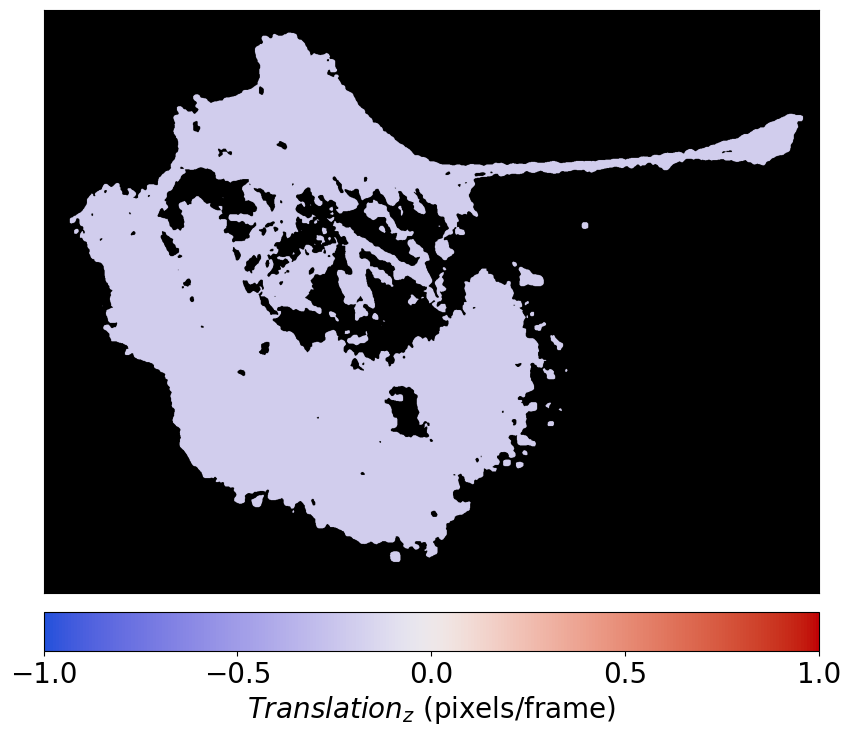

In [15]:
# vz - expected
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

toPlot = vz[zSlice,:]/vz[zSlice,:]
toPlot = toPlot*dz[f]/zscale

im = ax.imshow(toPlot,vmin=cmin, vmax=cmax,cmap=cc.m_CET_D1)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1A_TranslationOnly_vzExpected_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

cbar = plt.colorbar(im,ax=ax,orientation='horizontal',pad=0.025,ticks=cticks)
cbar.set_label("$Translation_z$ (pixels/frame)")

# Save with colorbar
saveName = 'FigureS1A_TranslationOnly_vzExpected_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

In [16]:
# Now put in real units for another comparison
vxS = vx*xyscale/tscale # Put into physical units
vyS = vy*xyscale/tscale # Put into physical units
vzS = vz*zscale/tscale # Put into physical units

# Calculate useful quantities
speed = np.sqrt(np.power(vxS,2)+np.power(vyS,2)+np.power(vzS,2))
theta = np.arctan2(vyS,vxS) # Ranges from -pi to pi
phi = np.arctan(vzS/np.sqrt(np.power(vxS,2)+np.power(vyS,2))) # ranges from -pi/2 to pi/2

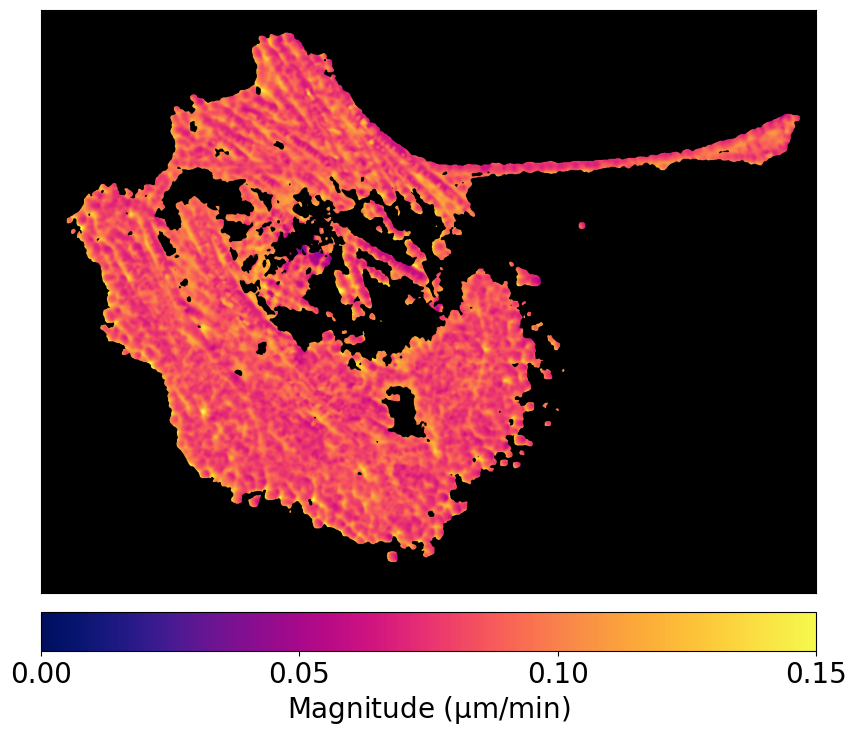

In [17]:
# Magnitude
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

cmax = 0.15
cmin = 0
im = ax.imshow(speed[zSlice,:],vmin=cmin, vmax=cmax,cmap=cc.m_CET_L8)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1C_TranslationOnly_Magnitude_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

cbar = plt.colorbar(im,ax=ax,orientation='horizontal',pad=0.025,ticks=[0,0.05,0.1,0.15])
cbar.set_label("Magnitude ($\\mathrm{\\mu}$m/min)")

# Save with colorbar
saveName = 'FigureS1C_TranslationOnly_Magnitude_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

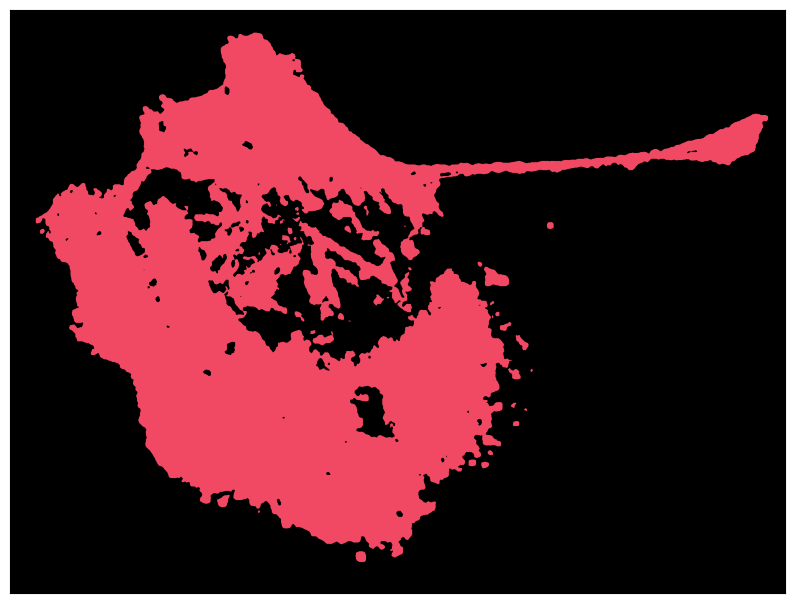

In [18]:
# Magnitude - Expected
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

toPlot = speed[zSlice,:]/speed[zSlice,:]
toPlot = toPlot*ds[f]

im = ax.imshow(toPlot,vmin=cmin, vmax=cmax,cmap=cc.m_CET_L8)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1C_TranslationOnly_MagnitudeExpected_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

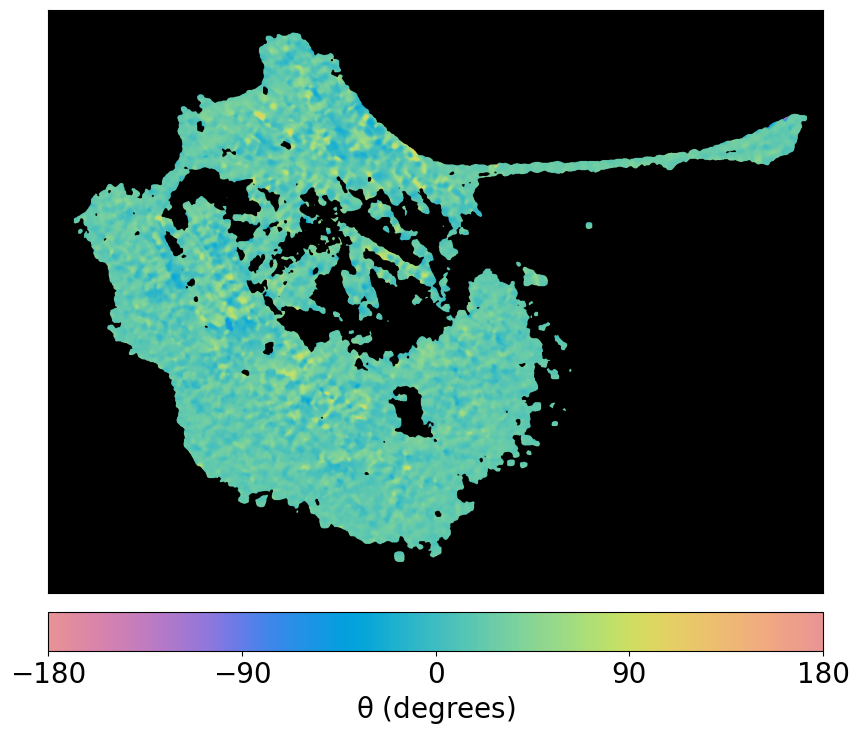

In [19]:
# Theta
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

cmax = 180
cmin = -cmax
im = ax.imshow(theta[zSlice,:]*180/np.pi,vmin=cmin, vmax=cmax,cmap=cc.m_CET_C8_r)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1C_TranslationOnly_Theta_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

cbar = plt.colorbar(im,ax=ax,orientation='horizontal',pad=0.025,ticks=[-180,-90,0,90,180])
cbar.set_label("$\\mathrm{\\theta}$ (degrees)")

# Save with colorbar
saveName = 'FigureS1C_TranslationOnly_Theta_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

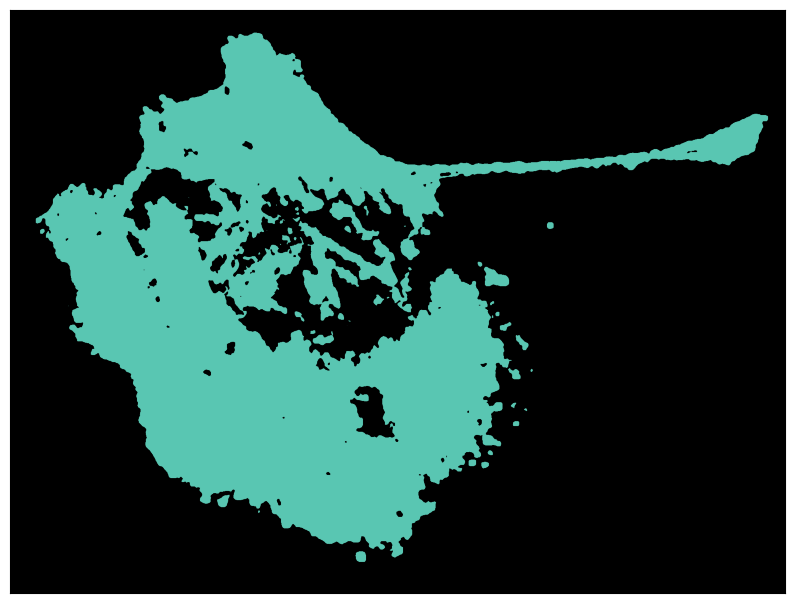

In [20]:
# Theta Expected
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

toPlot = theta[zSlice,:]/theta[zSlice,:]
toPlot = toPlot*dtheta[f]
im = ax.imshow(toPlot*180/np.pi,vmin=cmin, vmax=cmax,cmap=cc.m_CET_C8_r)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1C_TranslationOnly_ThetaExpected_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

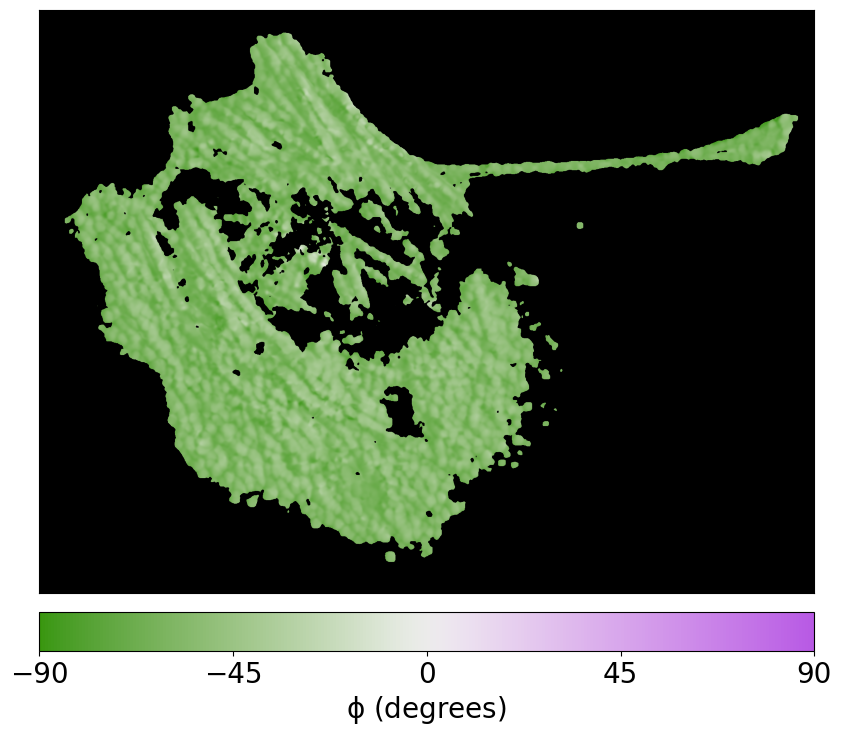

In [21]:
# Phi
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

cmax = 90
cmin = -cmax
im = ax.imshow(phi[zSlice,:]*180/np.pi,vmin=cmin, vmax=cmax,cmap=cc.m_CET_D2)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1C_TranslationOnly_Phi_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

cbar = plt.colorbar(im,ax=ax,orientation='horizontal',pad=0.025,ticks=[-90,-45,0,45,90])
cbar.set_label("$\\mathrm{\\phi}$ (degrees)")

# Save with colorbar
saveName = 'FigureS1C_TranslationOnly_Phi_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

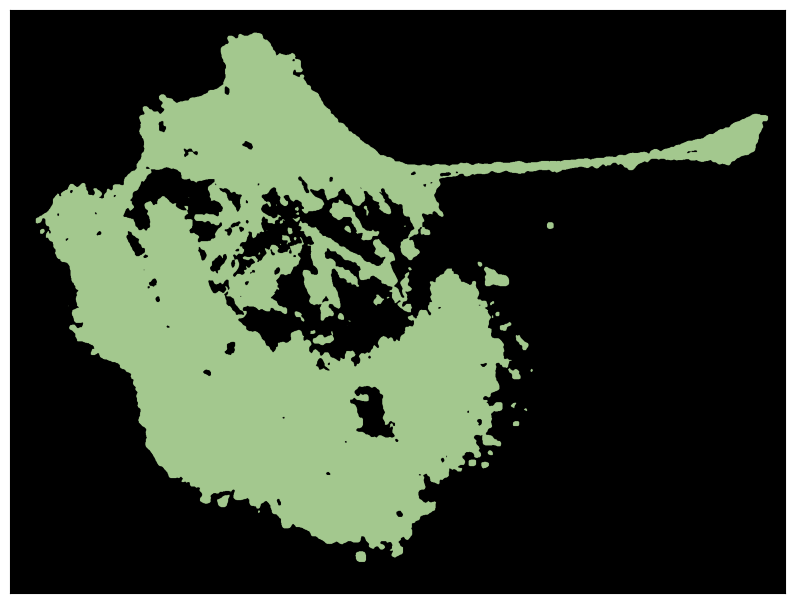

In [22]:
# Phi Expected
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

toPlot = phi[zSlice,:]/phi[zSlice,:]
toPlot = toPlot*dphi[f]
im = ax.imshow(toPlot*180/np.pi,vmin=cmin, vmax=cmax,cmap=cc.m_CET_D2)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
# plt.axis('off')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

# Save without colorbar
saveName = 'FigureS1C_TranslationOnly_PhiExpected_Frame' + str(f) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

In [23]:
# Calculations over time

binV = np.linspace(-1.5,1.5,31) # In pixels
binS = np.linspace(0,0.2,31) # In um/min
binT = np.linspace(-180,180,31) # degrees
binP = np.linspace(-90,90,31) # degrees

frames = np.arange(3,44)
Nt = dx.shape[0]
mean_vx = np.ones([Nt,1]).astype(float)*np.nan
mean_vy = np.ones([Nt,1]).astype(float)*np.nan
mean_vz = np.ones([Nt,1]).astype(float)*np.nan
meanSpeed = np.ones([Nt,1]).astype(float)*np.nan
meanTheta = np.ones([Nt,1]).astype(float)*np.nan
meanPhi = np.ones([Nt,1]).astype(float)*np.nan

std_vx = np.ones([Nt,1]).astype(float)*np.nan
std_vy = np.ones([Nt,1]).astype(float)*np.nan
std_vz = np.ones([Nt,1]).astype(float)*np.nan
stdSpeed = np.ones([Nt,1]).astype(float)*np.nan
# These are circular standard deviation (could also choose to use circular variance?)
stdTheta = np.ones([Nt,1]).astype(float)*np.nan
stdPhi = np.ones([Nt,1]).astype(float)*np.nan

vxDist = np.zeros([binV.shape[0]-1,Nt])
vyDist = np.zeros([binV.shape[0]-1,Nt])
vzDist = np.zeros([binV.shape[0]-1,Nt])
speedDist = np.zeros([binS.shape[0]-1,Nt])
thetaDist = np.zeros([binT.shape[0]-1,Nt])
phiDist = np.zeros([binP.shape[0]-1,Nt])

for idx, f in enumerate(frames):

    # Reliability thresholding
    relFile = dataName + '_rel_t' + str(f).zfill(4) + '.tiff'
    rel = tf.imread(dataDir / relFile)
    relThresh = np.percentile(rel,relPer)
    relMask = rel > relThresh

    # Load and format velocity data
    vxFile = dataName + '_vx_t' + str(f).zfill(4) + '.tiff'
    vx = tf.imread(dataDir / vxFile)
    vx = vx*relMask # Remove unreliable vectors
    vx[vx==0] = np.nan    

    vyFile = dataName + '_vy_t' + str(f).zfill(4) + '.tiff'
    vy = tf.imread(dataDir / vyFile)
    vy = vy*relMask # Remove unreliable vectors
    vy = -vy # Positive y is down the image by default, but the current visualization, want to say that it is up
    vy[vy==0] = np.nan    

    vzFile = dataName + '_vz_t' + str(f).zfill(4) + '.tiff'
    vz = tf.imread(dataDir / vzFile)
    vz = vz*relMask # Remove unreliable vectors
    vz[vz==0] = np.nan
    
    # Values in pixels
    mean_vx[f] = np.nanmean(vx)
    mean_vy[f] = np.nanmean(vy)
    mean_vz[f] = np.nanmean(vz)
    std_vx[f] = np.nanstd(vx)
    std_vy[f] = np.nanstd(vy)
    std_vz[f] = np.nanstd(vz)
    vxDist[:,f] = np.histogram(vx.flatten(),binV,density=True)[0]
    vyDist[:,f] = np.histogram(vy.flatten(),binV,density=True)[0]
    vzDist[:,f] = np.histogram(vz.flatten(),binV,density=True)[0]

    # Put into physical units for remaining calculations
    vx = vx*xyscale/tscale 
    vy = vy*xyscale/tscale
    vz = vz*zscale/tscale

    # Calculate useful quantities
    speed = np.sqrt(np.power(vx,2)+np.power(vy,2)+np.power(vz,2))
    theta = np.arctan2(vy,vx) # Ranges from -pi to pi
    phi = np.arctan(vz/np.sqrt(np.power(vx,2)+np.power(vy,2))) # ranges from -pi/2 to pi/2

    # Magnitude
    meanSpeed[f] = np.nanmean(speed)
    stdSpeed[f] = np.nanstd(speed)

    # Mean theta
    term1 = np.sin(theta)
    term1 = np.nansum(term1)/term1.size
    term2 = np.cos(theta)
    term2 = np.nansum(term2)/term2.size
    meanTheta[f] = np.atan2(term1,term2)*180/np.pi
    # stdTheta[f] = 1-np.sqrt(np.power(term1,2)+np.power(term2,2)) # Variance
    stdTheta[f] = np.sqrt(-2*np.log(np.sqrt(np.power(term1,2)+np.power(term2,2)))) # Standard Deviation

    # Mean phi
    term1 = np.sin(phi)
    term1 = np.nansum(term1)/term1.size
    term2 = np.cos(phi)
    term2 = np.nansum(term2)/term2.size
    meanPhi[f] = np.atan2(term1,term2)*180/np.pi
    # stdPhi[f] = 1-np.sqrt(np.power(term1,2)+np.power(term2,2)) # Variance
    stdPhi[f] = np.sqrt(-2*np.log(np.sqrt(np.power(term1,2)+np.power(term2,2)))) # Standard Deviation

    # Distributions    
    speedDist[:,f] = np.histogram(speed.flatten(),binS,density=True)[0]
    thetaDist[:,f] = np.histogram(theta.flatten()*180/np.pi,binT,density=True)[0]
    phiDist[:,f] = np.histogram(phi.flatten()*180/np.pi,binP,density=True)[0]


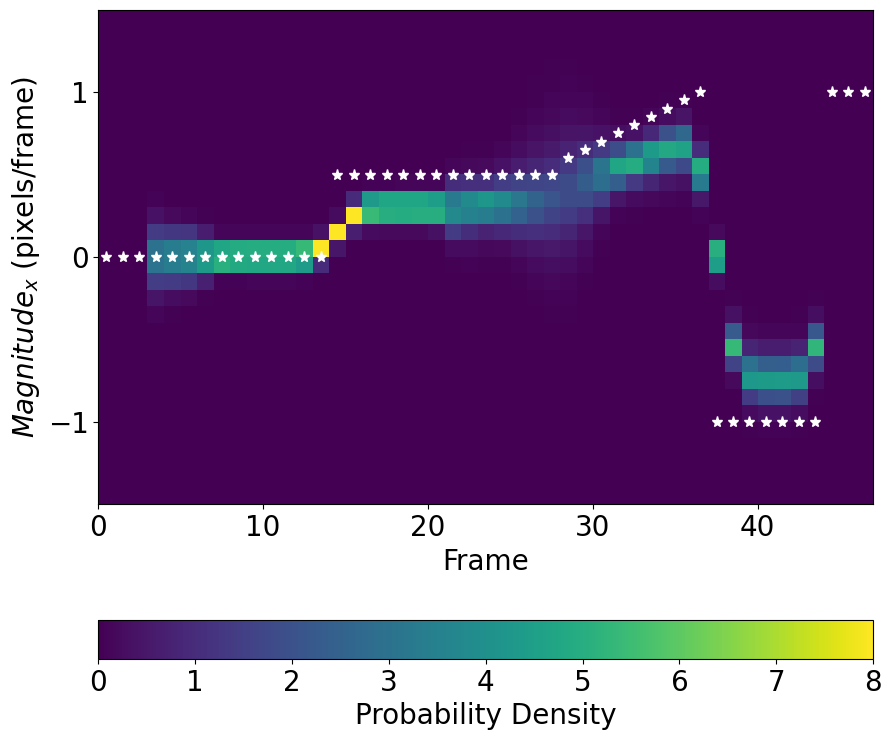

In [25]:
# vx Distribution vs Time
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

cmin=0
cmax=8

plt.rcParams.update({'font.size': 20}) # Set global font size

plotExtent = np.array([0,Nt,binV.max(),binV.min()])
aspectFactor = plotExtent[2]-plotExtent[3]
im = ax.imshow(vxDist,extent=plotExtent,aspect=30/aspectFactor,vmin=cmin,vmax=cmax)
ax.plot(t+.5,dx/xyscale,'*w',linewidth=3,markersize=8)
ax.set_xlabel("Frame")
ax.set_ylabel("$Magnitude_x$ (pixels/frame)")
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_ylim([binV.min(),binV.max()])
cbar = plt.colorbar(im,ax=ax,orientation='horizontal')
cbar.set_label("Probability Density")

# Save with colorbar
saveName = 'FigureS1B_TranslationOnly_VxDistributionHeatmap_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')
# Save with colorbar
saveName = 'FigureS1B_TranslationOnly_VxDistributionHeatmap_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

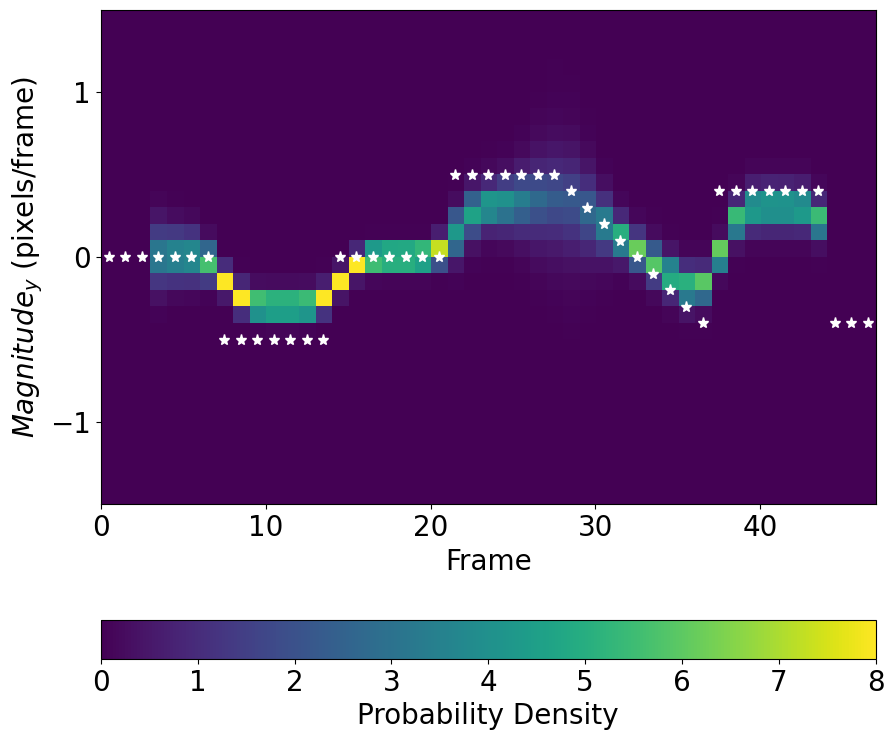

In [26]:
# vy Distribution vs Time
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.rcParams.update({'font.size': 20}) # Set global font size

plotExtent = np.array([0,Nt,binV.max(),binV.min()])
aspectFactor = plotExtent[2]-plotExtent[3]
im = ax.imshow(vyDist,extent=plotExtent,aspect=30/aspectFactor,vmin=cmin,vmax=cmax)
ax.plot(t+.5,dy/xyscale,'*w',linewidth=3,markersize=8)
ax.set_xlabel("Frame")
ax.set_ylabel("$Magnitude_y$ (pixels/frame)")
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_ylim([binV.min(),binV.max()])
cbar = plt.colorbar(im,ax=ax,orientation='horizontal')
cbar.set_label("Probability Density")

# Save with colorbar
saveName = 'FigureS1B_TranslationOnly_VyDistributionHeatmap_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')
saveName = 'FigureS1B_TranslationOnly_VyDistributionHeatmap_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

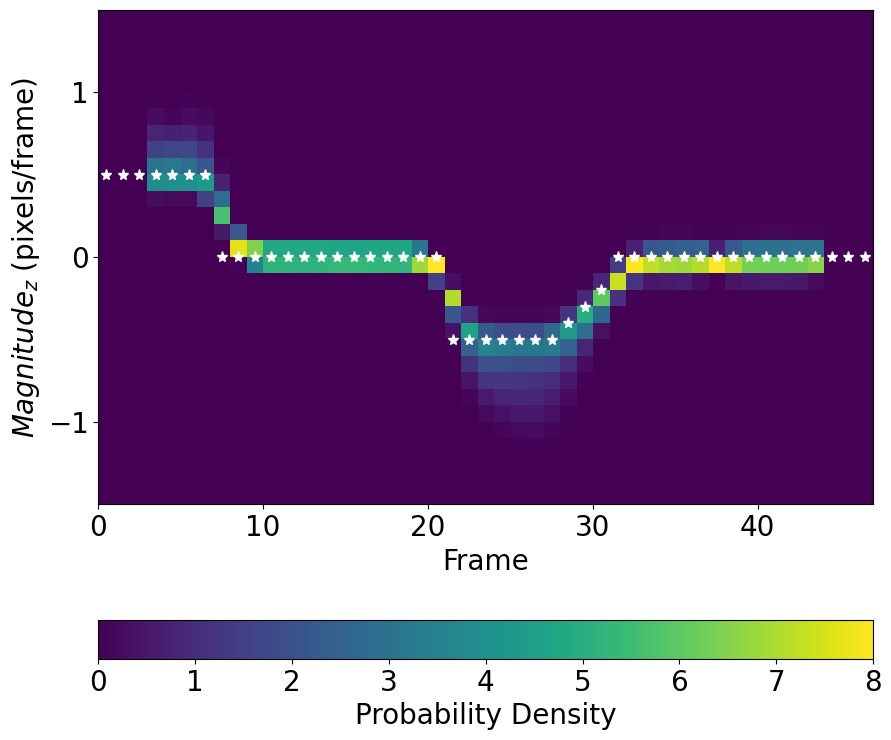

In [27]:
# vz Distribution vs Time
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.rcParams.update({'font.size': 20}) # Set global font size

plotExtent = np.array([0,Nt,binV.max(),binV.min()])
aspectFactor = plotExtent[2]-plotExtent[3]
im = ax.imshow(vzDist,extent=plotExtent,aspect=30/aspectFactor,vmin=cmin,vmax=cmax)
ax.plot(t+.5,dz/zscale,'*w',linewidth=3,markersize=8)
ax.set_xlabel("Frame")
ax.set_ylabel("$Magnitude_z$ (pixels/frame)")
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_ylim([binV.min(),binV.max()])
cbar = plt.colorbar(im,ax=ax,orientation='horizontal')
cbar.set_label("Probability Density")

# Save with colorbar
saveName = 'FigureS1B_TranslationOnly_VzDistributionHeatmap_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')
saveName = 'FigureS1B_TranslationOnly_VzDistributionHeatmap_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

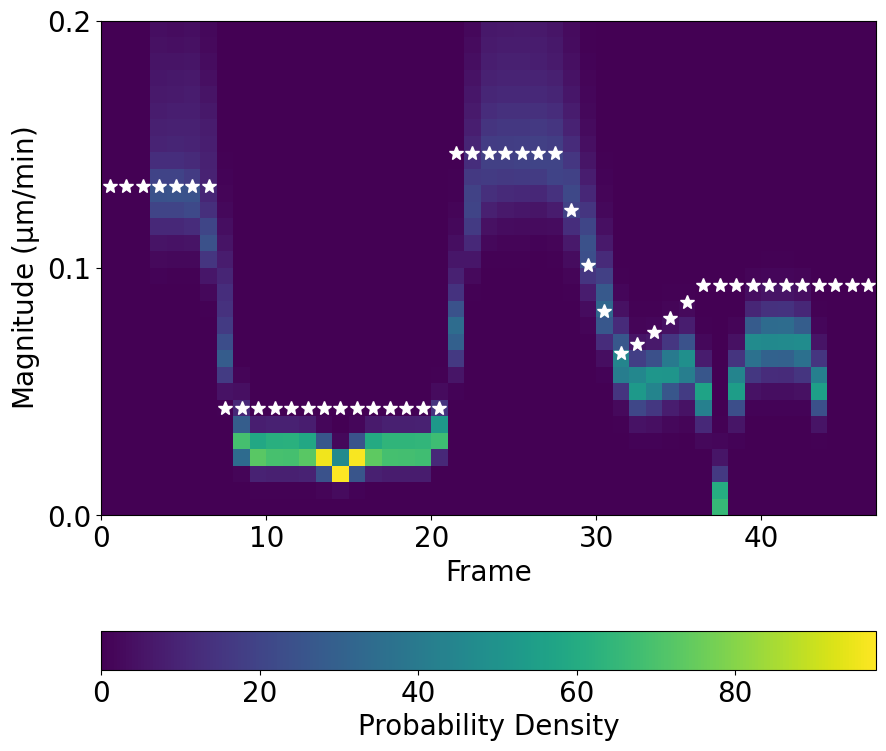

In [30]:
# Magnitude Distribution vs Time
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.rcParams.update({'font.size': 20}) # Set global font size

plotExtent = np.array([0,Nt,binS.max(),binS.min()])
aspectFactor = plotExtent[2]-plotExtent[3]
im = ax.imshow(speedDist,extent=plotExtent,aspect=30/aspectFactor)
ax.plot(t+.5,ds,'*w',linewidth=3,markersize=10)
ax.set_xlabel("Frame")
ax.set_ylabel("Magnitude ($\\mathrm{\\mu}$m/min)")
ax.set_yticks([0,0.1,0.2])
ax.set_ylim([binS.min(),binS.max()])
cbar = plt.colorbar(im,ax=ax,orientation='horizontal')
cbar.set_label("Probability Density")

# Save with colorbar
saveName = 'FigureS1D_TranslationOnly_MagnitudeDistributionHeatmap_colorbar.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')
saveName = 'FigureS1D_TranslationOnly_MagnitudeDistributionHeatmap_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

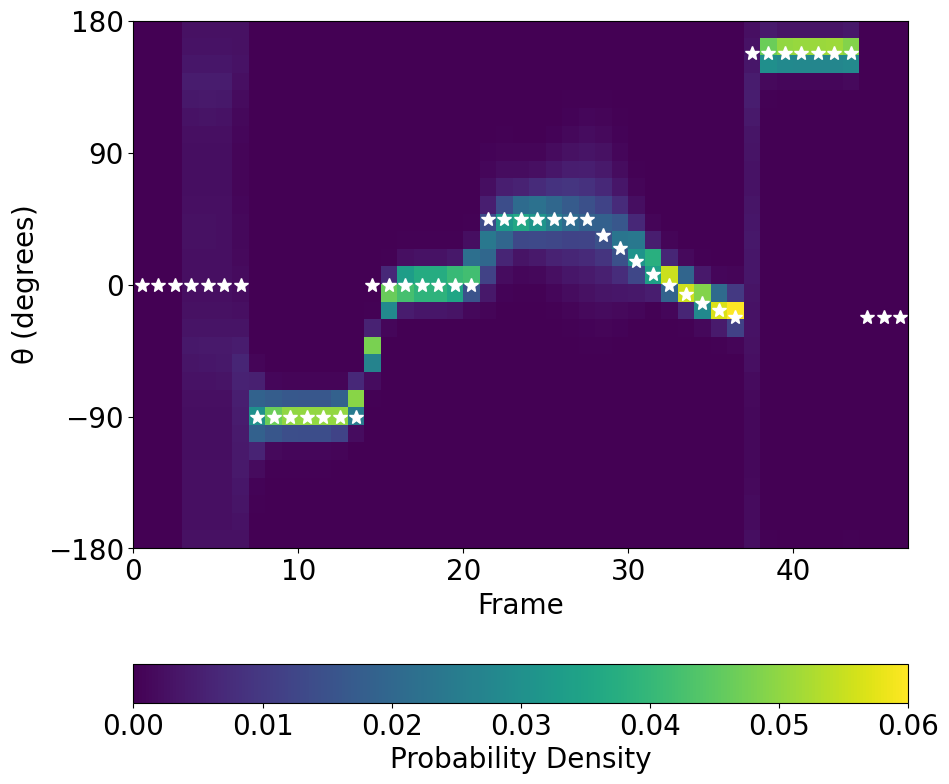

In [34]:
# Theta Distribution vs Time
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.rcParams.update({'font.size': 20}) # Set global font size

plotExtent = np.array([0,Nt,binT.max(),binT.min()])
aspectFactor = plotExtent[2]-plotExtent[3]
im = ax.imshow(thetaDist,extent=plotExtent,aspect=32/aspectFactor)
ax.plot(t+.5,dtheta*180/np.pi,'*w',linewidth=3,markersize=10)
ax.set_xlabel("Frame")
ax.set_ylabel("$\\mathrm{\\theta}$ (degrees)")
ax.set_yticks([-180,-90,0,90,180])
ax.set_ylim([binT.min(),binT.max()])
cbar = plt.colorbar(im,ax=ax,orientation='horizontal')
cbar.set_label("Probability Density")

# Save with colorbar
saveName = 'FigureS1D_TranslationOnly_ThetaDistributionHeatmap_colorbar.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')
saveName = 'FigureS1D_TranslationOnly_ThetaDistributionHeatmap_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

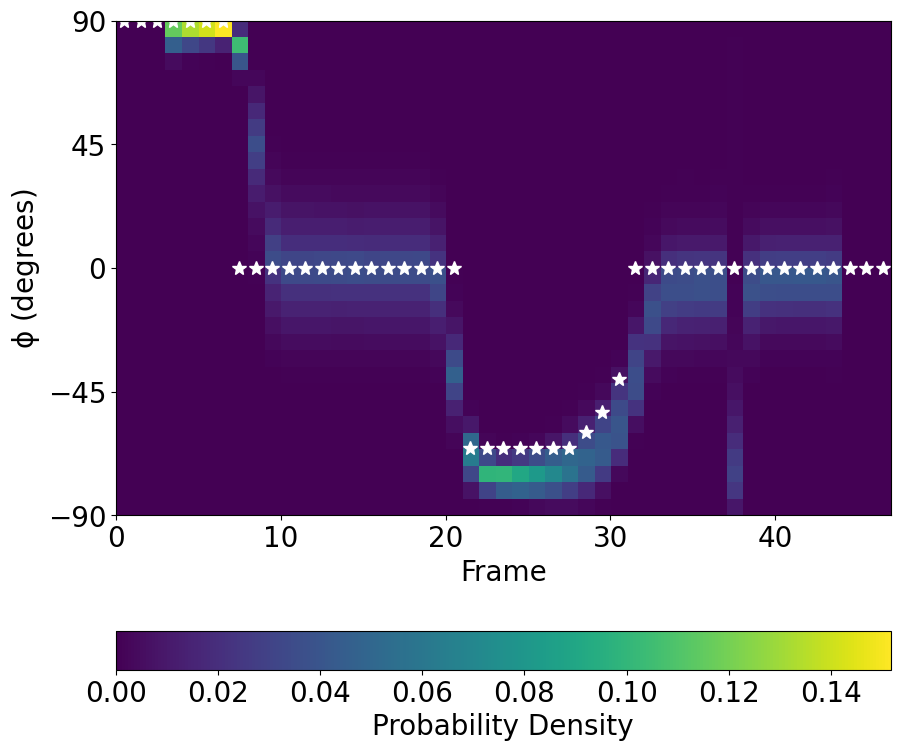

In [32]:
# Phi Distribution vs Time
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.rcParams.update({'font.size': 20}) # Set global font size

plotExtent = np.array([0,Nt,binP.max(),binP.min()])
aspectFactor = plotExtent[2]-plotExtent[3]
im = ax.imshow(phiDist,extent=plotExtent,aspect=30/aspectFactor)
ax.plot(t+.5,dphi*180/np.pi,'*w',linewidth=3,markersize=10)
ax.set_xlabel("Frame")
ax.set_ylabel("$\\mathrm{\\phi}$ (degrees)")
ax.set_yticks([-90,-45,0,45,90])
ax.set_ylim([binP.min(),binP.max()])
cbar = plt.colorbar(im,ax=ax,orientation='horizontal')
cbar.set_label("Probability Density")

# Save with colorbar
saveName = 'FigureS1D_TranslationOnly_PhiDistributionHeatmap_colorbar.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')
saveName = 'FigureS1D_TranslationOnly_PhiDistributionHeatmap_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()